# Tutorial on ProfileHistogram

In [1]:
from matplotlib import pyplot as plt
import poisson_approval as pa

## Profile

Generate a random profile:

In [2]:
generator_profile = pa.GeneratorProfileHistogramUniform(n_bins = 10)
profile = generator_profile()
profile

<abc: 0.18890938560894532 [0.13393351 0.02013136 0.07476864 0.07444938 0.03667761 0.06322726
 0.45445469 0.02780528 0.02505587 0.0894964 ], acb: 0.33224687847990764 [0.00793336 0.11552382 0.11605388 0.08164517 0.008182   0.06331206
 0.12628987 0.0157799  0.20739576 0.25788418], bac: 0.044577597402163494 [0.01811799 0.10388619 0.00862752 0.16048967 0.03052624 0.14443829
 0.32283677 0.11659627 0.09335992 0.00112113], bca: 0.3107857630238704 [0.08705945 0.21534907 0.01019125 0.25125925 0.11310234 0.00800757
 0.13589862 0.09217074 0.03798775 0.04897397], cab: 0.0012305774861577357 [0.21126279 0.05016869 0.2848006  0.13228294 0.03485529 0.08352746
 0.01191863 0.08321433 0.05829271 0.04967656], cba: 0.12224979799895541 [0.00863964 0.13899273 0.00551384 0.0737621  0.25031811 0.08505295
 0.08895789 0.12108927 0.12362433 0.10404915]> (Condorcet winner: a)

Share of each ranking:

In [3]:
profile.d_ranking_share

{abc: 0.18890938560894532, acb: 0.33224687847990764, bac: 0.044577597402163494, bca: 0.3107857630238704, cab: 0.0012305774861577357, cba: 0.12224979799895541}

Distribution of the utilities for voters $abc$:

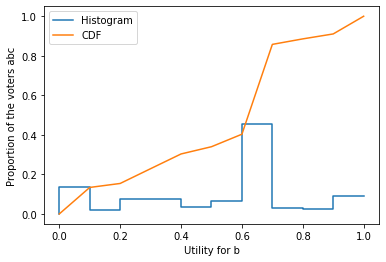

In [4]:
ranking = 'abc'
profile.plot_histogram(ranking, label='Histogram')
profile.plot_cdf(ranking, label='CDF')
plt.ylabel('Proportion of the voters %s' % ranking)
plt.legend()

## Strategic Analysis

Generate a random strategy:

In [5]:
generator_strategy = pa.GeneratorStrategyThresholdUniform()
strategy = generator_strategy()
strategy

<abc: utility-dependent (0.3966435378026776), acb: utility-dependent (0.05249431462970078), bac: utility-dependent (0.33759698745669897), bca: utility-dependent (0.7160604617027472), cab: utility-dependent (0.4813472196359111), cba: utility-dependent (0.006722412657342858)>

Tau vector (ballot shares) associated to the strategy in the given profile:

In [6]:
tau = profile.tau(strategy)
tau

<a: 0.05820458855672905, ab: 0.1681530300072475, ac: 0.3312239364285123, b: 0.26822754898438095, bc: 0.1732500374013703, c: 0.0009408586217599765> ==> b

Is the strategy an equilibrium for the given profile?

In [7]:
profile.is_equilibrium(strategy)

EquilibriumStatus.NOT_EQUILIBRIUM

Use iterated voting to search for an equilibrium:

In [8]:
result = profile.iterated_voting(strategy_ini=strategy, n_max_episodes=1000, 
                                 ballot_update_ratio=0.1)
cycle_taus_actual = result['cycle_taus_actual']
cycle_strategies = result['cycle_strategies']

In [9]:
cycle_taus_actual

[]

In [10]:
if len(cycle_taus_actual) == 0:
    print('No convergence.')
elif len(cycle_taus_actual) == 1:
    print('Convergence to an equilibrium.')
    print('Limit strategy: %s' % cycle_strategies[0])
    print('Limit tau-vector: %s' % cycle_taus_actual[0])
else:
    print('Convergence to a cycle of cardinality %s.' % len(cycle_taus_actual))

No convergence.


There is another version of iterated voting, ``fictitious_play``. It allows for update ratios that depend on time, it is faster, but it is not able to detect limit cycles (only convergence). Cf. Reference section for more information.

In [11]:
from math import log
result = profile.fictitious_play(strategy_ini=strategy, n_max_episodes=1000, 
                                 perception_update_ratio=pa.one_over_log_t_plus_two,
                                 ballot_update_ratio=0.1)
limit_tau = result['tau']
limit_strategy = result['strategy']

In [12]:
if limit_tau is None:
    print('No convergence.')
else:
    print('Convergence to an equilibrium.')
    print('Limit strategy: %s' % limit_strategy)
    print('Limit tau-vector: %s' % limit_tau)

Convergence to an equilibrium.
Limit strategy: <abc: a, acb: utility-dependent (0.9269555740385537), bac: b, bca: utility-dependent (0.07304442596144627), cab: ac, cba: bc> ==> a
Limit tau-vector: <a: 0.458570913519187, ac: 0.0638159280558237, b: 0.06434110843041413, bc: 0.4132720499945752> ==> a


The methods ``iterated_voting`` and ``fictitious_play`` also provide the winning frequency of each candidate. In case of convergence to a limit or a periodical orbit, these frequencies are computed at the limit. In case of non-convergence, it gives the winning frequencies on the history of the process.

In [13]:
result = profile.iterated_voting(strategy_ini=strategy, n_max_episodes=10, 
                                 ballot_update_ratio=0.1)
result['d_candidate_winning_frequency']

{a: 3/11, b: 8/11}

If you want to convert these winning frequencies to an array, you can use the function ``d_candidate_value_to_array``:

In [14]:
pa.d_candidate_value_to_array(result['d_candidate_winning_frequency'])

array([Fraction(3, 11), Fraction(8, 11), 0], dtype=object)